### This is the version of 4 regression models using Imputed_MICE_RandomForest data with 'DRG PROGRAM' grouped.

In [1]:
# IMPORT MODULES

import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# import tensorflow as tf
# from keras import models, regularizers, layers, optimizers, losses, metrics
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import np_utils
# from keras.utils import to_categorical

print(os.getcwd())
print("Modules imported \n")
import os
# print(os.listdir("../input/"))

/Users/aurorazheng/Documents/datafest
Modules imported 



In [3]:
data = pd.read_excel('../datafest/Imputed_MICE_RandomForest.xlsx')
print("With id", data.shape)
data_full = data
print("No id",data_full.shape)

With id (474, 22)
No id (474, 22)


In [4]:
df_los = data_full.dropna(subset=['LOS'])
df_los

,TC_ID,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS,ICU LOS,LOS Outlier,Discharge Disposition,Age
0,43,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Med/Surg,Orthopaedic Surgery,Acute Rehab,...,No,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,6.54,1.82,Not Outlier,Intermediate Care,78.0
1,155,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,Acute Rehab,...,No,Bloodless,Male,Lymphoma,Medicare Managed Care,6.00,3.00,Not Outlier,Acute-Another Hosp,56.0
2,340,Accepted,Bakersfield Memorial,Arcadia,False,False,"Surgery, Otorhino",ICU,Orthopaedic Surgery,Acute Rehab,...,No,Bloodless,Female,Hem-Oncology,Medicaid,6.13,1.56,Not Outlier,Home Health Org,60.0
3,433,Accepted,Norris Cancer Hospital,Arcadia,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,ER,...,No,Bloodless,Female,Infectious Disease,Managed Exchange,2.00,2.00,Not Outlier,Expired,53.0
4,440,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Med/Surg,Ohns/Ent,Acute Rehab,...,No,Bloodless,Female,Infectious Disease,Medicaid,6.58,1.40,Not Outlier,Expired,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,48195,Accepted,Valley Presbyterian,Apple Valley,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,...,No,Bloodless,Female,Other Gi Medicine,Medicaid Managed Care,6.00,0.00,Outlier,Home/Self Care,63.0
470,48256,Accepted,Verdugo Hills,Apple Valley,False,False,Cardiology,Stepdown,Ohns/Ent,Acute Rehab,...,No,Bloodless,Female,Percutaneous Cardiac Procedures,Medicare,2.00,0.00,Not Outlier,Home/Self Care,75.0
471,48420,Accepted,County Lac Usc,Citrus Valley,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,...,No,Bloodless,Female,Fracture/Injury,Medicare,5.00,0.00,Not Outlier,Home Health Org,46.0
472,48526,Accepted,Garfield,Citrus Valley,False,False,"Surgery, Neurolo- Spine",Med/Surg,Orthopaedic Surgery,ER,...,No,Bloodless,Female,Infectious Disease,Medicaid,6.23,0.14,Not Outlier,Home Health Org,49.0


tensorflow not supported for python 3.8

In [5]:
data_full.info()
data_full.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 22 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   TC_ID                                              474 non-null    int64  
 1   Request Status                                     474 non-null    object 
 2   Transfer Referral Source                           474 non-null    object 
 3   County                                             474 non-null    object 
 4   Transfer Back Agreement                            474 non-null    bool   
 5   LOA (Mark X if Yes)                                474 non-null    bool   
 6   Accepting Physician Specialty                      474 non-null    object 
 7   Required Level Of Care                             474 non-null    object 
 8   Requested Treatment Intervention                   474 non-null    object 
 9   From Where

,TC_ID,LOS,ICU LOS,Age
count,474.000000,474.000000,474.000000,474.000000
mean,23446.607595,8.790127,2.526962,58.485781
std,14189.722432,11.751631,8.831258,17.114172
min,43.000000,1.000000,0.000000,18.000000
25%,11013.250000,4.000000,0.000000,46.135000
50%,22680.000000,6.000000,0.140000,60.000000
75%,35168.250000,8.000000,1.000000,71.000000
max,48531.000000,132.000000,132.000000,90.000000


In [6]:
data_full.head(5)

,TC_ID,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS,ICU LOS,LOS Outlier,Discharge Disposition,Age
0,43,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Med/Surg,Orthopaedic Surgery,Acute Rehab,...,No,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,6.54,1.82,Not Outlier,Intermediate Care,78.0
1,155,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,Acute Rehab,...,No,Bloodless,Male,Lymphoma,Medicare Managed Care,6.00,3.00,Not Outlier,Acute-Another Hosp,56.0
2,340,Accepted,Bakersfield Memorial,Arcadia,False,False,"Surgery, Otorhino",ICU,Orthopaedic Surgery,Acute Rehab,...,No,Bloodless,Female,Hem-Oncology,Medicaid,6.13,1.56,Not Outlier,Home Health Org,60.0
3,433,Accepted,Norris Cancer Hospital,Arcadia,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,ER,...,No,Bloodless,Female,Infectious Disease,Managed Exchange,2.00,2.00,Not Outlier,Expired,53.0
4,440,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Med/Surg,Ohns/Ent,Acute Rehab,...,No,Bloodless,Female,Infectious Disease,Medicaid,6.58,1.40,Not Outlier,Expired,42.0


In [7]:
# Label = LOS
# the attributes that is NOT related to LOS
y = df_los['LOS']
X = df_los.drop('LOS', 1)
X = X.drop('LOA (Mark X if Yes)', 1)
X = X.drop('From Where Patient Admitted to Referring Facility', 1)
X = X.drop('EMTALA Y/N(Patient Status Details)', 1)
X = X.drop('Special Considerations', 1)
X = X.drop('Transfer Back Agreement', 1)
X = X.drop('Transfer Referral Source', 1)
X = X.drop('Infection Precaution',1)
X = X.drop('Request Status',1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (474,)
X - No Label No id  (474, 13)
Index(['TC_ID', 'County', 'Accepting Physician Specialty',
       'Required Level Of Care', 'Requested Treatment Intervention',
       'Patient Status', 'Gender', 'DRG Program', 'Payor', 'ICU LOS',
       'LOS Outlier', 'Discharge Disposition', 'Age'],
      dtype='object')


Based on discussion, the features and attributes that we care most are Patient Status, DRG PROGRAM, LOS Outlier, Discharge Disposition and Age. let's see how each of them distributed. 

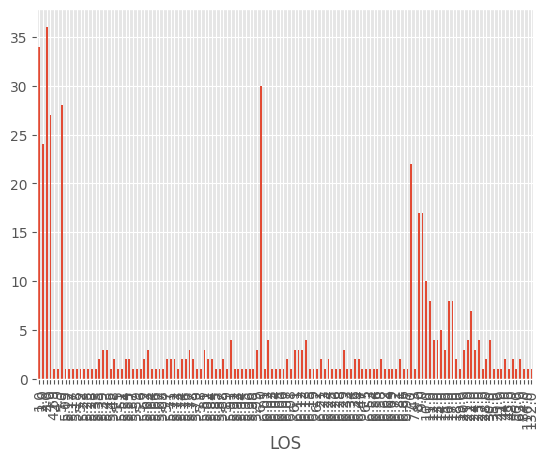

In [8]:
df_los.groupby('LOS').size().plot.bar()
plt.show()

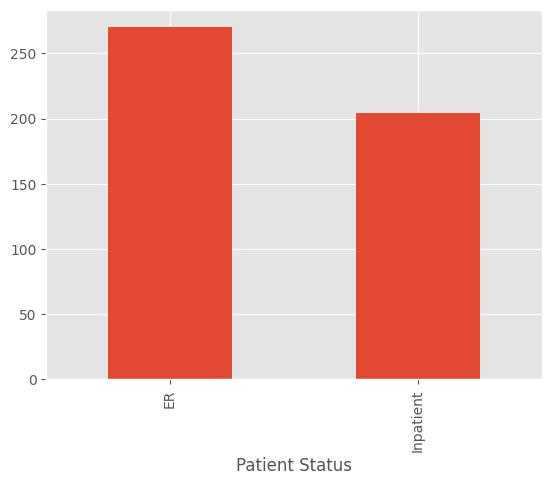

In [9]:
df_los.groupby('Patient Status').size().plot.bar()
plt.show()

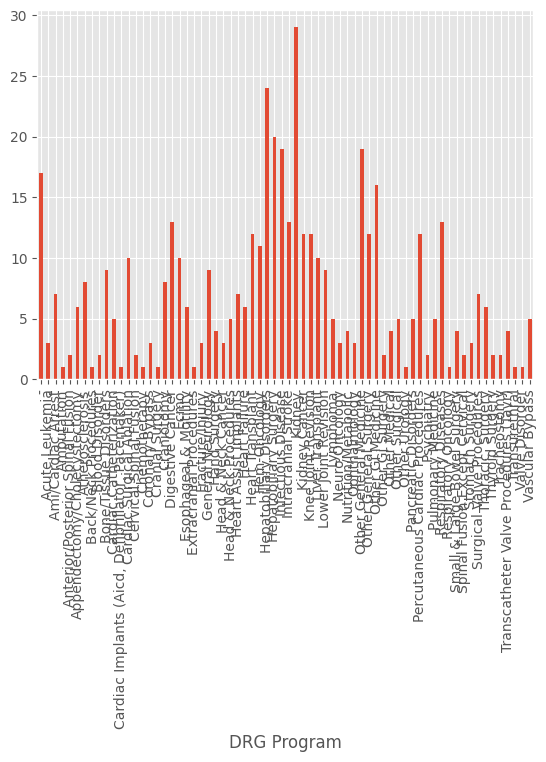

In [10]:
df_los.groupby('DRG Program').size().plot.bar()
plt.show()

#### group the lower portion of categories to one bigger categories, clean the data, lowercase

In [11]:
total = df_los['DRG Program'].count()
value_counts = df_los['DRG Program'].value_counts(normalize=True)
df_counts = pd.DataFrame({'value': value_counts.index, 'count': value_counts.values})
df_counts['portion'] = df_counts['count'].apply(lambda x: x/total)
df_counts = df_counts.sort_values(by='portion', ascending=False)
df_counts

,value,count,portion
0,Kidney,0.061181,0.000129
1,Hepatobiliary Disorders,0.050633,0.000107
2,Hepatobiliary Surgery,0.042194,0.000089
3,Infectious Disease,0.040084,0.000085
4,Other General Medicine,0.040084,0.000085
...,...,...,...
63,"Cardiac Implants (Aicd, Defibrillator, Pacemaker)",0.002110,0.000004
64,Transurethral,0.002110,0.000004
65,Respiratory Oncology,0.002110,0.000004
66,Back/Neck Procedures,0.002110,0.000004


In [12]:
counts = df_los['DRG Program'].value_counts().sort_values(ascending=False)
threshold = counts.quantile(0.8)
df_los['DRG Program'] = [x if counts[x] >= threshold and x != '-' else 'Other' for x in df_los['DRG Program']]
df_los['DRG Program']


0                                Other
1                                Other
2                                Other
3                   Infectious Disease
4                   Infectious Disease
                    ...               
469                  Other Gi Medicine
470    Percutaneous Cardiac Procedures
471                              Other
472                 Infectious Disease
473              Hepatobiliary Surgery
Name: DRG Program, Length: 474, dtype: object

In [13]:
counts = df_los['DRG Program'].value_counts().sort_values(ascending=False)
counts

Other                              248
Kidney                              29
Hepatobiliary Disorders             24
Hepatobiliary Surgery               20
Infectious Disease                  19
Other General Medicine              19
Other Gi Medicine                   16
Intracranial Stroke                 13
Digestive Cancer                    13
Respiratory Diseases                13
Heart Transplant                    12
Other General Surgery               12
Kidney Cancer                       12
Percutaneous Cardiac Procedures     12
Knee Joint Revision                 12
Name: DRG Program, dtype: int64

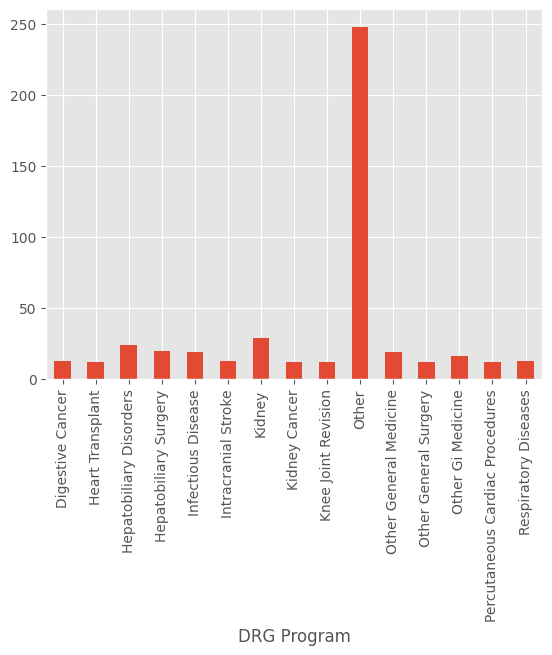

In [14]:
df_los.groupby('DRG Program').size().plot.bar()
plt.show()

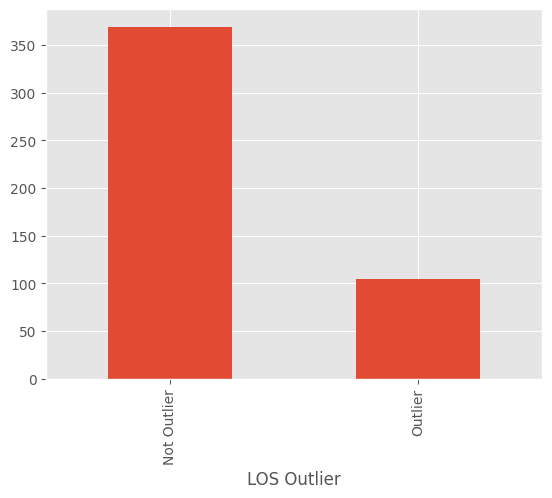

In [15]:
df_los.groupby('LOS Outlier').size().plot.bar()
plt.show()

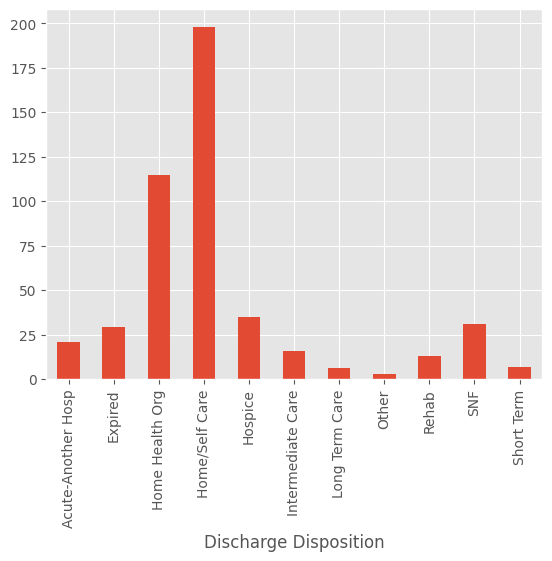

In [16]:
df_los.groupby('Discharge Disposition').size().plot.bar()
plt.show()

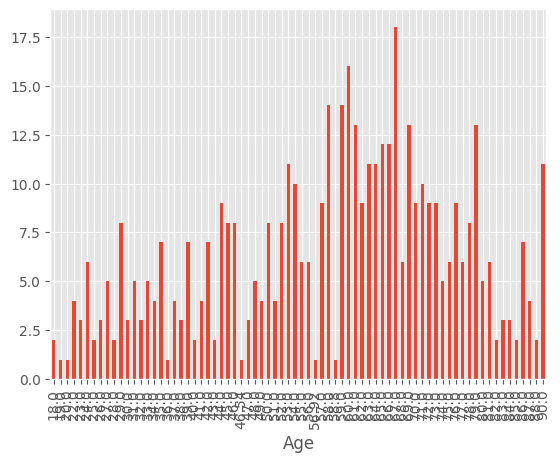

In [17]:
df_los.groupby('Age').size().plot.bar()
plt.show()

#### Patient Status, DRG PROGRAM, LOS Outlier, Discharge Disposition are all categorical features, it's necessary to convert categorical features to numerical. I use one-hot-encoding here

In [18]:
#                     
categorical_columns = [
                    'DRG Program',
                    'Patient Status',                     
                    'Discharge Disposition'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(474, 91)


In [19]:
#                     
categorical_columns = [
                    'DRG Program',
                    'Patient Status',                     
                    'Discharge Disposition'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in df_los.columns:
        one_hot_encoded = pd.get_dummies(df_los[col])
        df_los = df_los.drop(col, axis=1)
        df_los = df_los.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(df_los.shape)

(474, 47)


In [23]:
print(df_los.shape)
print(X.shape)
#XnotNorm = np.array(X.copy())
XnotNorm = df_los.copy()
print('XnotNorm ', XnotNorm.shape)

ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

(474, 47)
(474, 91)
XnotNorm  (474, 47)
ynotNorm  (474,)


In [24]:
XnotNorm = XnotNorm.drop('Accepting Physician Specialty',1)
XnotNorm = XnotNorm.drop('Required Level Of Care',1)
XnotNorm = XnotNorm.drop('Requested Treatment Intervention',1)
XnotNorm = XnotNorm.drop('Gender',1)
XnotNorm = XnotNorm.drop('Payor',1)
XnotNorm = XnotNorm.drop('LOA (Mark X if Yes)', 1)
XnotNorm = XnotNorm.drop('From Where Patient Admitted to Referring Facility', 1)
XnotNorm = XnotNorm.drop('EMTALA Y/N(Patient Status Details)', 1)
XnotNorm = XnotNorm.drop('Special Considerations', 1)
XnotNorm = XnotNorm.drop('Transfer Back Agreement', 1)
XnotNorm = XnotNorm.drop('Transfer Referral Source', 1)
XnotNorm = XnotNorm.drop('Infection Precaution',1)
XnotNorm = XnotNorm.drop('Request Status',1)
XnotNorm = XnotNorm.drop('LOS',1)
XnotNorm = XnotNorm.drop('ICU LOS',1)
XnotNorm = XnotNorm.drop('LOS Outlier',1)
XnotNorm = XnotNorm.drop('County',1)
# XnotNorm = XnotNorm.drop('DRG PROGRAM',1)
# XnotNorm = XnotNorm.drop('PAYOR',1)
XnotNorm.columns


Index(['TC_ID', 'Age', 'Digestive Cancer', 'Heart Transplant',
       'Hepatobiliary Disorders', 'Hepatobiliary Surgery',
       'Infectious Disease', 'Intracranial Stroke', 'Kidney', 'Kidney Cancer',
       'Knee Joint Revision', 'Other_left', 'Other General Medicine',
       'Other General Surgery', 'Other Gi Medicine',
       'Percutaneous Cardiac Procedures', 'Respiratory Diseases', 'ER',
       'Inpatient', 'Acute-Another Hosp', 'Expired', 'Home Health Org',
       'Home/Self Care', 'Hospice', 'Intermediate Care', 'Long Term Care',
       'Other_right', 'Rehab', 'SNF', 'Short Term'],
      dtype='object')

In [25]:
ynotNorm

0       6.54
1       6.00
2       6.13
3       2.00
4       6.58
       ...  
469     6.00
470     2.00
471     5.00
472     6.23
473    22.00
Name: LOS, Length: 474, dtype: float64

In [26]:
# clean data
# 89+ to 89
XnotNorm.replace('Unknown', pd.np.nan, inplace=True)
XnotNorm.replace('89+', 90, inplace=True)

Normalize X

In [27]:
x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
#print(XNorm)
#print(y)
print('X normalized')

X normalized


In [28]:
XNorm.columns = XNorm.columns.astype(str) 
XNorm

,TC_ID,Age,Digestive Cancer,Heart Transplant,Hepatobiliary Disorders,Hepatobiliary Surgery,Infectious Disease,Intracranial Stroke,Kidney,Kidney Cancer,...,Expired,Home Health Org,Home/Self Care,Hospice,Intermediate Care,Long Term Care,Other_right,Rehab,SNF,Short Term
0,-1.651078,1.141442,-0.167927,-0.161165,-0.23094,-0.209888,-0.204348,-0.167927,-0.255281,-0.161165,...,-0.255281,-0.565981,-0.846990,-0.282359,5.350234,-0.113228,-0.079809,-0.167927,-0.264532,-0.122431
1,-1.643176,-0.145400,-0.167927,-0.161165,-0.23094,-0.209888,-0.204348,-0.167927,-0.255281,-0.161165,...,-0.255281,-0.565981,-0.846990,-0.282359,-0.186908,-0.113228,-0.079809,-0.167927,-0.264532,-0.122431
2,-1.630125,0.088571,-0.167927,-0.161165,-0.23094,-0.209888,-0.204348,-0.167927,-0.255281,-0.161165,...,-0.255281,1.766844,-0.846990,-0.282359,-0.186908,-0.113228,-0.079809,-0.167927,-0.264532,-0.122431
3,-1.623564,-0.320879,-0.167927,-0.161165,-0.23094,-0.209888,4.893605,-0.167927,-0.255281,-0.161165,...,3.917247,-0.565981,-0.846990,-0.282359,-0.186908,-0.113228,-0.079809,-0.167927,-0.264532,-0.122431
4,-1.623070,-0.964300,-0.167927,-0.161165,-0.23094,-0.209888,4.893605,-0.167927,-0.255281,-0.161165,...,3.917247,-0.565981,-0.846990,-0.282359,-0.186908,-0.113228,-0.079809,-0.167927,-0.264532,-0.122431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,1.745950,0.264050,-0.167927,-0.161165,-0.23094,-0.209888,-0.204348,-0.167927,-0.255281,-0.161165,...,-0.255281,-0.565981,1.180652,-0.282359,-0.186908,-0.113228,-0.079809,-0.167927,-0.264532,-0.122431
470,1.750253,0.965964,-0.167927,-0.161165,-0.23094,-0.209888,-0.204348,-0.167927,-0.255281,-0.161165,...,-0.255281,-0.565981,1.180652,-0.282359,-0.186908,-0.113228,-0.079809,-0.167927,-0.264532,-0.122431
471,1.761823,-0.730329,-0.167927,-0.161165,-0.23094,-0.209888,-0.204348,-0.167927,-0.255281,-0.161165,...,-0.255281,1.766844,-0.846990,-0.282359,-0.186908,-0.113228,-0.079809,-0.167927,-0.264532,-0.122431
472,1.769301,-0.554850,-0.167927,-0.161165,-0.23094,-0.209888,4.893605,-0.167927,-0.255281,-0.161165,...,-0.255281,1.766844,-0.846990,-0.282359,-0.186908,-0.113228,-0.079809,-0.167927,-0.264532,-0.122431


In [30]:
# SPLIT into Train & Test

X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=7)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (379, 30)
X_test:  (95, 30)
y_train:  (379,)
y_test:  (95,)


In [31]:

# Test Models and evaluation metric
seed = 42
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
Mymodels.append(('LinearReg', LinearRegression()))
Mymodels.append(('Ridge', Ridge(alpha=0.5)))
Mymodels.append(('RandomForestRegressor', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)))
Mymodels.append(('Lasso', Lasso(alpha=0.1)))

# Evaluate each model in turn
results = []
names = []
# ,error_score='raise'
for name, model in Mymodels:
    # Train the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("%s mse: %f "% (name, mse))
    
    
    
#     kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg) 

LinearReg mse: 190.690829 
Ridge mse: 191.016929 
RandomForestRegressor mse: 185.392176 
Lasso mse: 189.353118 


# Linear Regressor

In [32]:
# Optimize hyper params for one model

Linearmodel = LinearRegression()

param_grid = [{},]

Linearmodel = GridSearchCV(Linearmodel, param_grid, cv=5, scoring=scoring)
Linearmodel.fit(XNorm, y)

print(Linearmodel.best_estimator_)

LinearRegression()


In [33]:
Linearmodel = LinearRegression()

In [34]:
Linearmodel.fit(XNorm, y)
final_predictions = Linearmodel.predict(X_test)
# Generate the R-squared
r2 = r2_score(y_test, final_predictions)
# cm = confusion_matrix(y_test, final_predictions)
print('R-squared:', r2)
mse = mean_squared_error(y_test, final_predictions)

print("Mean Squared Error:", mse)

R-squared: 0.13313919997272627
Mean Squared Error: 167.8671272708205


# Random Forest Regressor

In [35]:
# Optimize hyper params for one model

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

param_grid = [{},]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=5, random_state=42)


In [36]:
model = RandomForestRegressor(max_depth=5, random_state=42)

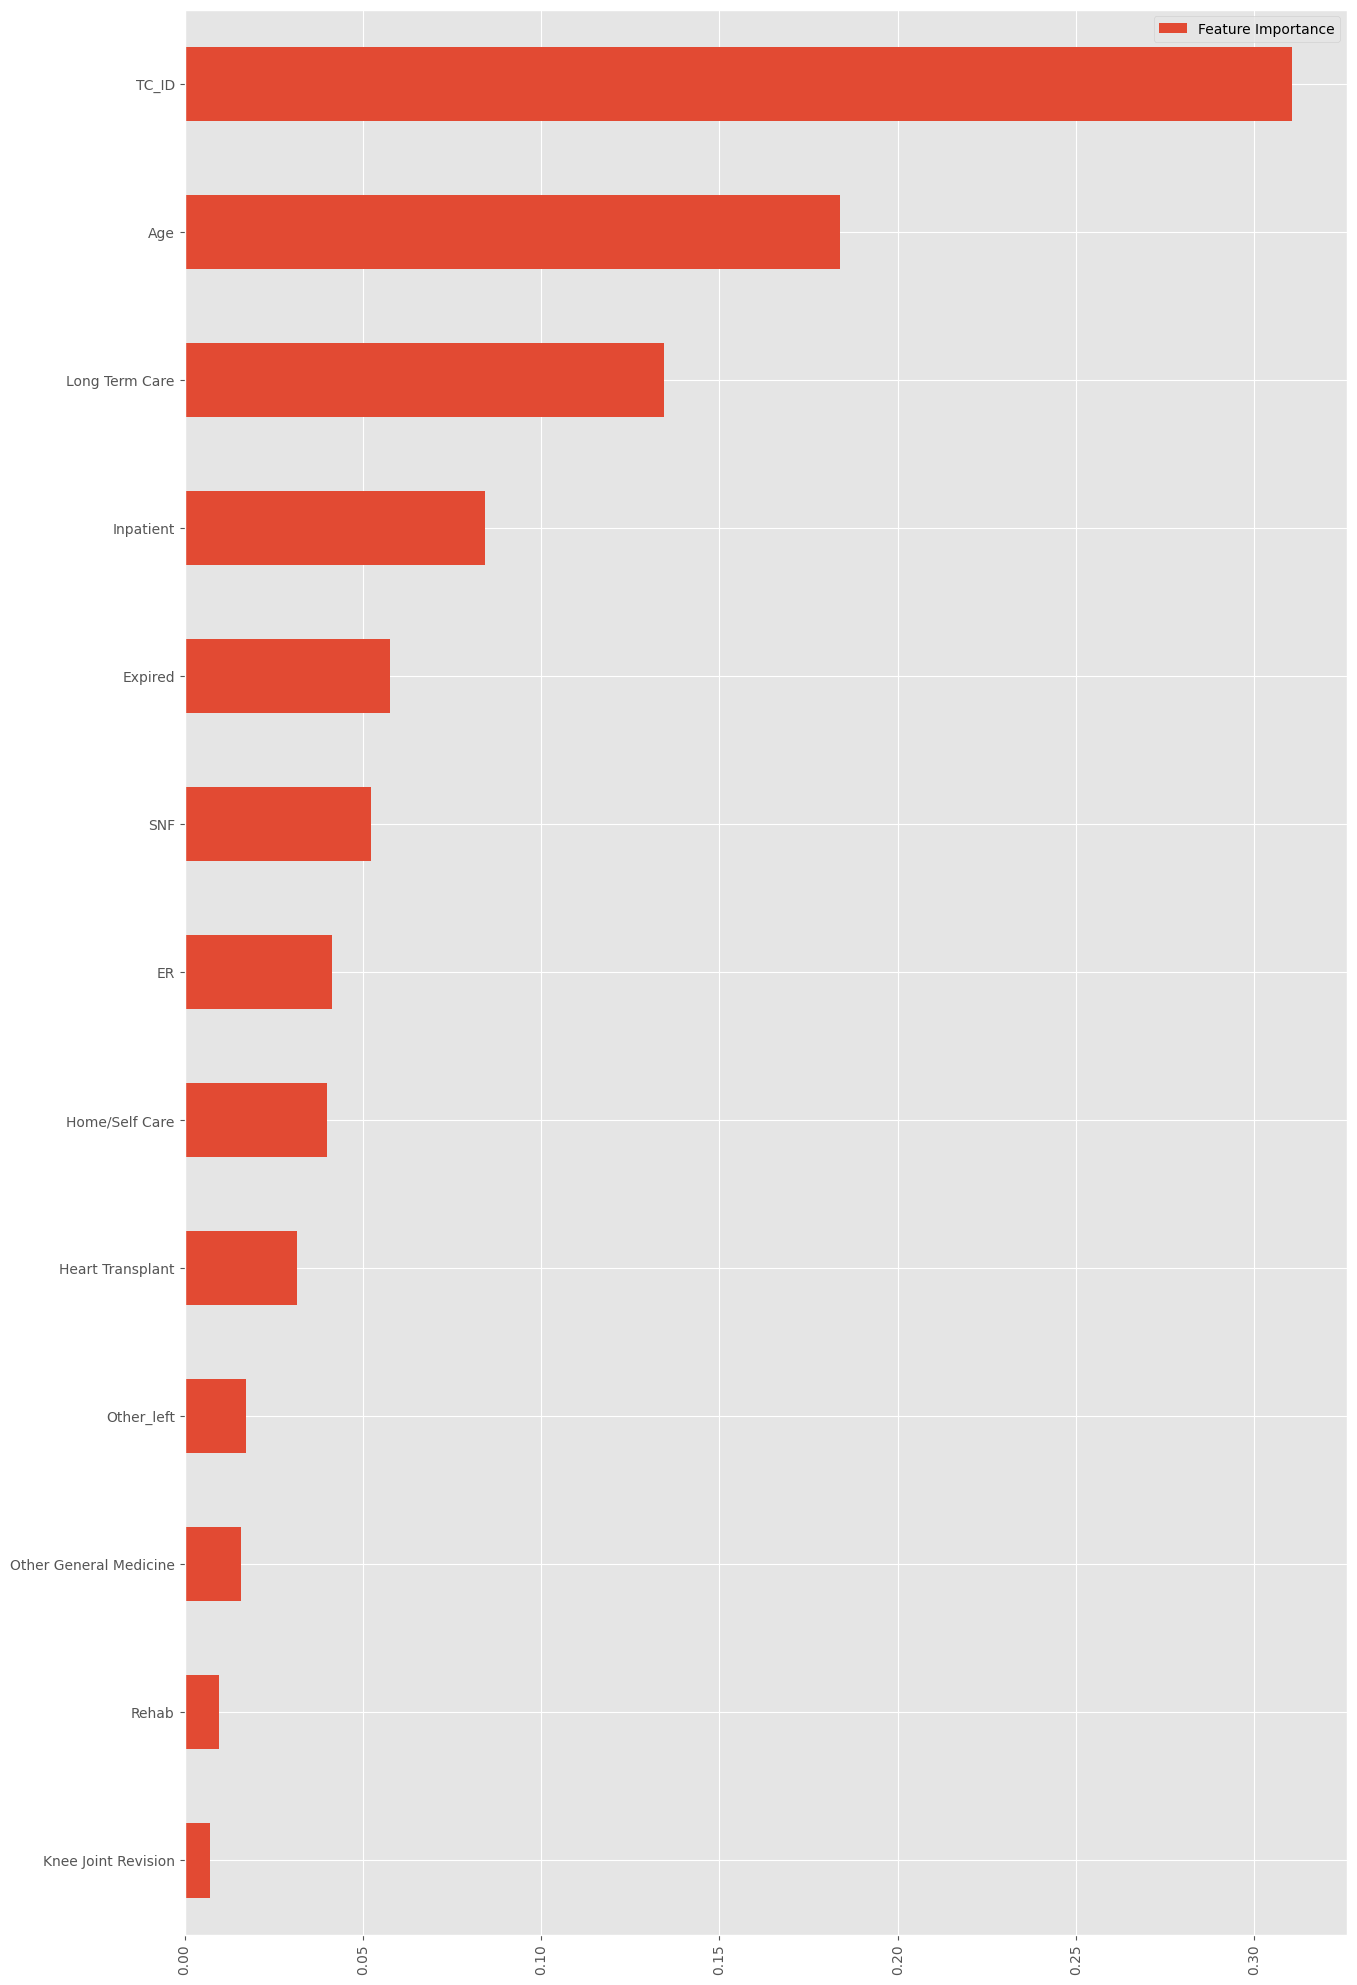

In [37]:
# FEATURE IMPORTANCE - NORMALIZED - last model

trainFinalFI = XNorm
yFinalFI = y

model.fit(trainFinalFI,yFinalFI)

FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model[FI_model["Feature Importance"] > 0.005].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [38]:
# List of important features for model
FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model=FI_model.sort_values('Feature Importance', ascending = False)
print(FI_model[FI_model["Feature Importance"] > 0.001])

                        Feature Importance
TC_ID                             0.310543
Age                               0.183882
Long Term Care                    0.134398
Inpatient                         0.084351
Expired                           0.057582
SNF                               0.052414
ER                                0.041435
Home/Self Care                    0.040026
Heart Transplant                  0.031533
Other_left                        0.017242
Other General Medicine            0.015951
Rehab                             0.009621
Knee Joint Revision               0.007119
Acute-Another Hosp                0.004102
Other General Surgery             0.003599
Home Health Org                   0.002504
Hepatobiliary Surgery             0.002226


In [39]:
# Model fit and evaluation on test

final_predictions = model.predict(X_test)

In [40]:
# Generate the R-squared
r2 = r2_score(y_test, final_predictions)
print('R-squared:', r2)
mse = mean_squared_error(y_test, final_predictions)

print("Mean Squared Error:", mse)


R-squared: 0.7526965038167623
Mean Squared Error: 47.89018890576696


# Ridge

In [41]:
# Optimize hyper params for one model

Ridgemodel = Ridge(alpha=0.5)

param_grid = [{},]

grid_search = GridSearchCV(Ridgemodel, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

Ridge(alpha=0.5)


In [42]:
# Model fit and evaluation on test
trainFinalFI = XNorm
yFinalFI = y

Ridgemodel.fit(trainFinalFI,yFinalFI)

Ridge_pred = Ridgemodel.predict(X_test)




In [43]:
# Generate the R-squared
r2 = r2_score(y_test, Ridge_pred)
print('R-squared:', r2)
mse = mean_squared_error(y_test, Ridge_pred)

print("Mean Squared Error:", mse)

R-squared: 0.13001407007137455
Mean Squared Error: 168.47230699387586


# Lasso

In [44]:
# Optimize hyper params for one model

Lassomodel = Lasso(alpha=0.1)

param_grid = [{},]

grid_search = GridSearchCV(Lassomodel, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

Lasso(alpha=0.1)


In [45]:
# Model fit and evaluation on test
trainFinalFI = XNorm
yFinalFI = y

Lassomodel.fit(trainFinalFI,yFinalFI)

Lasso_pred = Lassomodel.predict(X_test)


In [46]:
# Generate the R-squared
r2 = r2_score(y_test, Lasso_pred)
print('R-squared:', r2)
mse = mean_squared_error(y_test, Lasso_pred)

print("Mean Squared Error:", mse)

R-squared: 0.13201501819232997
Mean Squared Error: 168.08482446741698


In [47]:
# 1. binary 67 => feature selection MRMR dummy variables
# 2. singluar value decomposition 10% PCA components